# Driver code of Image Captioning

Do not change the code, just give the path of the files and the image for which you need to generate caption.

In [25]:
from keras.applications.xception import Xception
from pickle import dump, load
from keras.models import Model, load_model
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences

In [16]:
# load the model
def extract_features(image):
        #features = {}
        model = tf.keras.applications.Xception( include_top=False, pooling='avg' )
        image = Image.open(image)
        image = image.resize((299,299))
        image = np.expand_dims(image, axis=0)
        #image = preprocess_input(image)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        #features[img] = feature
        return feature
#2048 feature vector

In [23]:
def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text
def word_for_id(integer, tokenizer):
  for word, index in tokenizer.word_index.items():
      if index == integer:
          return word
  return None





start man in blue shirt and jeans is riding bicycle on the street end


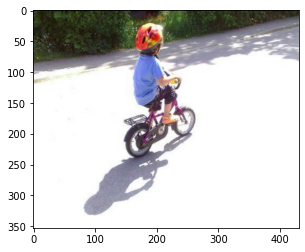

In [30]:
max_length = 32
img_path = "/content/drive/MyDrive/SMIIT/Image Captioning/child.png"
tokenizer = load(open("/content/drive/MyDrive/SMIIT/Image Captioning/tokenizer.p","rb"))
model = load_model('/content/drive/MyDrive/SMIIT/Image Captioning/model_9.h5')
#xception_model = Xception(include_top=False, pooling="avg")
photo = extract_features(img_path)
img = Image.open(img_path)
description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)